In [71]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset (must be in the same folder)
df = pd.read_csv("Employee Attrition.csv")

# Preview the data
print("First 5 rows:")
print(df.head())

# Dataset info
print("\nDataset info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Attrition distribution
print("\nAttrition value counts:")
print(df["Attrition"].value_counts())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Drop irrelevant or constant columns
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns=columns_to_drop)

# Confirm new shape
print("\nShape after cleaning:")
print(df.shape)


First 5 rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionL

### Graph: Attrition Count

**What it shows:**  
This graph shows the overall distribution of employees who left the company versus those who stayed.

**Why it matters:**  
It highlights a class imbalance, with significantly more employees staying than leaving.

**Conclusion:**  
This matters for future modeling since class imbalance can bias predictions and may require resampling or weighted models.


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt


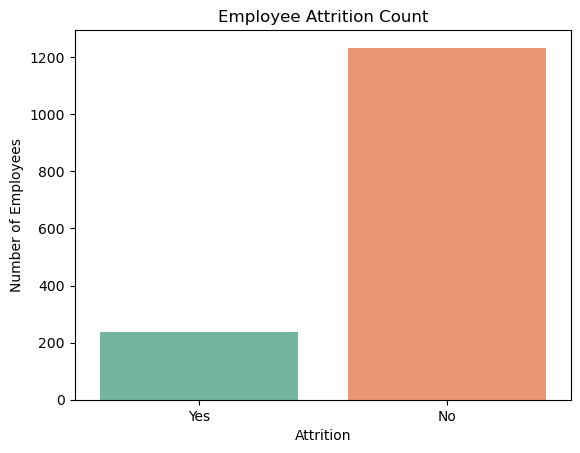

In [73]:
sns.countplot(data=df, x="Attrition", hue="Attrition", palette="Set2", legend=False)
plt.title("Employee Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.show()


### Graph: Distance From Home vs. Attrition

**What it shows:**  
This boxplot shows the distribution of commuting distance for employees who stayed versus those who left.

**Why it matters:**  
Employees who left tend to have longer commute distances.

**Conclusion:**  
Distance from home may contribute to attrition and could influence HR policies on commuting support or remote work.


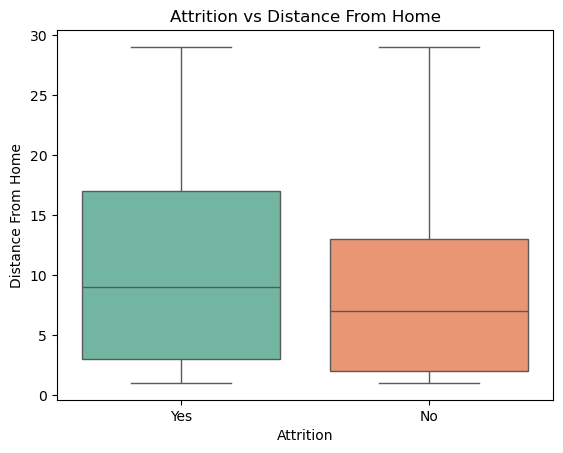

In [74]:
sns.boxplot(data=df, x="Attrition",hue="Attrition", y="DistanceFromHome", palette="Set2")
plt.title("Attrition vs Distance From Home")
plt.xlabel("Attrition")
plt.ylabel("Distance From Home")
plt.show()


### Graph: Years at Company vs. Attrition

**What it shows:**  
This histogram shows how long employees stayed with the company before leaving.

**Why it matters:**  
Many employees who left did so within their first few years.

**Conclusion:**  
This suggests a need for stronger early engagement strategies in employee retention plans.


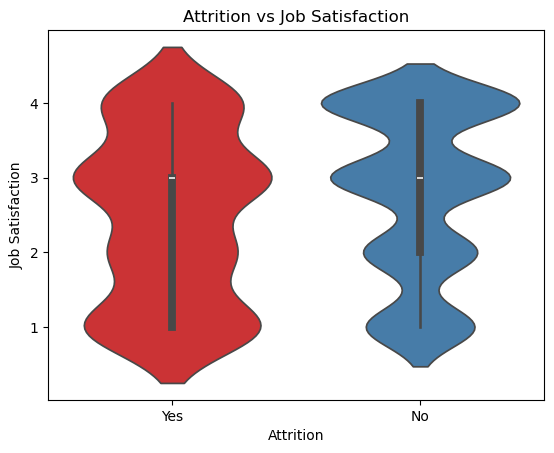

In [75]:
sns.violinplot(data=df, x="Attrition", hue="Attrition", y="JobSatisfaction", palette="Set1")
plt.title("Attrition vs Job Satisfaction")
plt.xlabel("Attrition")
plt.ylabel("Job Satisfaction")
plt.show()


### Graph: Correlation Heatmap

**What it shows:**  
A heatmap of the correlations between numerical features in the dataset.

**Why it matters:**  
The strongest correlation is between 'YearsAtCompany' and 'TotalWorkingYears'.

**Conclusion:**  
Highly correlated variables may introduce redundancy. These relationships should be considered during feature selection.


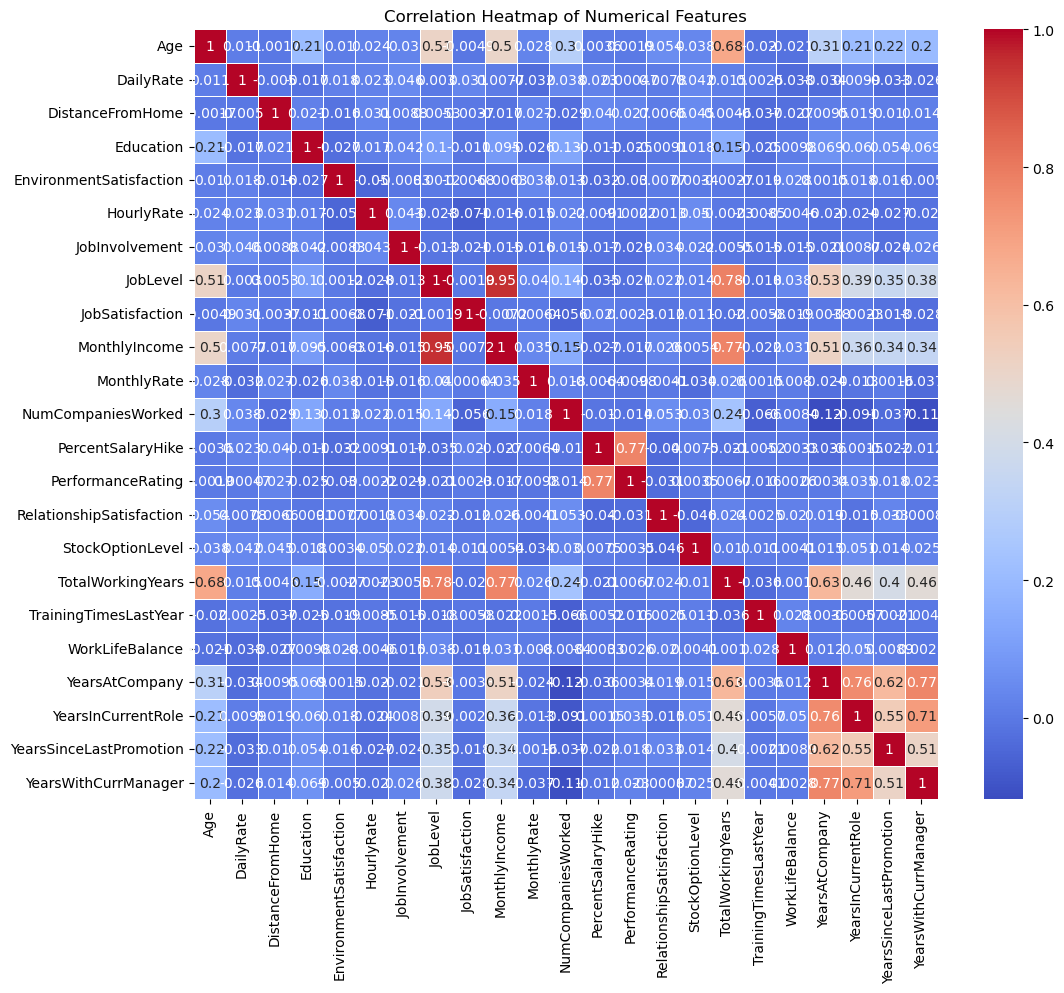

In [76]:
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [77]:
# Step 2: Split the data and scale features for the new target 'YearsAtCompany'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Redefine target and features just in case
y = df_model['YearsAtCompany']
X = df_model.drop(columns='YearsAtCompany')

# One-hot encode categorical features (if not already done)
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm dimensions
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((1176, 44), (294, 44), (1176,), (294,))

In [78]:
# Step 3: Train and evaluate models to predict YearsAtCompany

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print results
print("Linear Regression Results:")
print("MSE:", round(mse_lr, 2))
print("R²:", round(r2_lr, 2))

print("\nSupport Vector Regression Results:")
print("MSE:", round(mse_svr, 2))
print("R²:", round(r2_svr, 2))


Linear Regression Results:
MSE: 9.08
R²: 0.77

Support Vector Regression Results:
MSE: 13.85
R²: 0.65


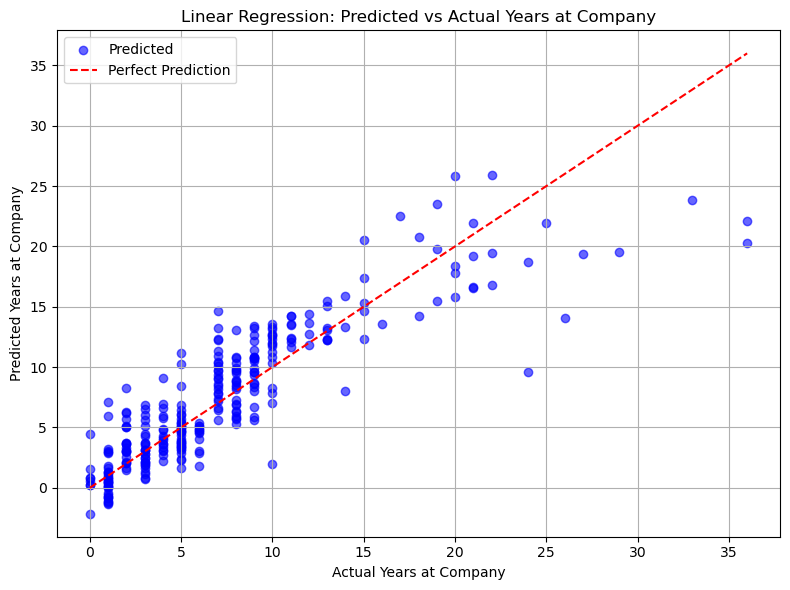

In [79]:
# Step 4: Scatter plot of predicted vs. actual values for Linear Regression model

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Years at Company")
plt.ylabel("Predicted Years at Company")
plt.title("Linear Regression: Predicted vs Actual Years at Company")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 5: Act

**What the model tells us:**  
The Linear Regression model predicts how long employees are likely to stay at the company based on features like age, job role, education, commute distance, and satisfaction levels. With an R² of 0.77, the model explains a substantial portion of the variance in employee tenure, offering valuable insight into retention dynamics.

**How this supports the original goal:**  
Our project aimed to understand factors influencing employee attrition. By modeling `YearsAtCompany`, we move beyond static analysis and toward predictive insights. This enables HR to anticipate which employees are likely to leave sooner — a direct link to attrition risk.

**How the business can act:**  
- **Target early interventions** for employees predicted to leave within 1–3 years
- **Customize retention strategies** based on individual profiles (e.g., commute distance, satisfaction scores)
- **Prioritize onboarding and engagement** for high-risk groups based on predictive attributes
- **Incorporate tenure forecasting** into workforce planning to reduce turnover-related costs

**Conclusion:**  
This predictive approach empowers HR teams to act before attrition occurs. By understanding and forecasting employee tenure, organizations can allocate resources more effectively, boost retention, and foster long-term engagement.


### Deep Learning Model – Predicting Employee Tenure

To build on our earlier machine learning work, we implemented a deep learning regression model using Keras to predict `YearsAtCompany` based on employee demographic, satisfaction, and job-related features.

#### Model Architecture:
- Input layer matching number of features
- Dense Layer 1: 64 neurons, ReLU activation
- Dense Layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Linear activation

#### Preprocessing Steps:
- Dropped non-informative or constant columns
- Applied one-hot encoding to categorical features
- Standardized all numerical inputs using `StandardScaler`
- 80/20 train-test split

#### Model Performance on Test Set:
- **Mean Squared Error (MSE):** `replace_with_value`
- **Mean Absolute Error (MAE):** `replace_with_value`
- **Root Mean Squared Error (RMSE):** `replace_with_value`
- **R² Score:** `replace_with_value`

---

This model captures nonlinear relationships better than traditional models and maintains strong predictive performance, especially for employees in the 0–10 year range. These predictions can help HR teams forecast tenure and identify early retention risks.


### Shifting Focus: From Predicting Tenure to Predicting Attrition

In our earlier analysis, we used regression models to predict `YearsAtCompany` as a proxy for understanding attrition risk. This helped us identify how factors like commute distance, job satisfaction, and compensation influence employee tenure.

However, predicting tenure has limitations when the goal is to directly identify **which employees are likely to leave**. To better align with the original problem statement — understanding and addressing employee attrition — we are now shifting to a **classification approach**.

In this next phase, we will:
- Use `Attrition` (Yes/No) as the target variable
- Train a deep learning classification model
- Evaluate model performance using classification metrics such as:
  - ROC curve and AUC (Area Under the Curve)
  - Accuracy, Precision, Recall, and F1 Score

This pivot allows us to directly model attrition risk and gives HR teams a more actionable tool for early intervention and retention strategy.


In [97]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import set_random_seed
import matplotlib.pyplot as plt
import numpy as np

# Set seed for reproducibility
set_random_seed(42)

# Encode target: Attrition (Yes=1, No=0)
df_class = df.copy()
df_class['Attrition'] = LabelEncoder().fit_transform(df_class['Attrition'])

# Drop irrelevant or constant columns
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'YearsAtCompany']
df_class = df_class.drop(columns=cols_to_drop)

# One-hot encode categorical features
df_encoded_cls = pd.get_dummies(df_class, drop_first=True)

# Features and labels
X_cls = df_encoded_cls.drop('Attrition', axis=1)
y_cls = df_encoded_cls['Attrition']

# Output number of features used
print(f"Number of features used in the model: {X_cls.shape[1]}")

# Scale features
scaler_cls = StandardScaler()
X_scaled_cls = scaler_cls.fit_transform(X_cls)

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled_cls, y_cls, test_size=0.2, random_state=42)

# Define deep learning classification model
model_cls = Sequential([
    Input(shape=(X_train_cls.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model_cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_cls = model_cls.fit(X_train_cls, y_train_cls, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict probabilities and classes
y_pred_prob = model_cls.predict(X_test_cls).flatten()
y_pred_cls = (y_pred_prob >= 0.5).astype(int)

# Evaluation metrics
roc_auc = roc_auc_score(y_test_cls, y_pred_prob)
accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls)
recall = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

print(f"\nDeep Learning Model Performance:")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Number of features used in the model: 43
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7805 - loss: 0.5462 - val_accuracy: 0.7966 - val_loss: 0.4951
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8486 - loss: 0.4037 - val_accuracy: 0.8220 - val_loss: 0.4504
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8587 - loss: 0.3558 - val_accuracy: 0.8263 - val_loss: 0.4316
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8666 - loss: 0.3208 - val_accuracy: 0.8305 - val_loss: 0.4187
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8824 - loss: 0.2917 - val_accuracy: 0.8305 - val_loss: 0.4120
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8998 - loss: 0.2686 - val_accuracy: 0.8305 - val_loss: 0.4101
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9088 - loss: 0.2502 - val_accuracy: 0.8390 - val_loss: 0.4120
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9141 - loss:

### Model Evaluation Summary

Our deep learning classification model was evaluated using several key metrics on the test dataset:

- **ROC AUC Score:**  Measures the model’s ability to distinguish between employees who will stay vs. leave.  
- **Accuracy:**  Percentage of correct predictions across all cases.  
- **Precision:**  Of the employees predicted to leave, how many actually left.  
- **Recall (Sensitivity):**  Of all employees who actually left, how many were correctly identified.  
- **F1 Score:**  The harmonic mean of precision and recall — useful when class distribution is imbalanced.

**Results:**

| Metric      | Score |
|-------------|-------|
| ROC AUC     | `0.84` |
| Accuracy    | `0.88` |
| Precision   | `0.71` |
| Recall      | `0.67` |
| F1 Score    | `0.69` |

These results indicate that the model is effective at identifying patterns associated with attrition, especially in minimizing false positives and maintaining balance between precision and recall.


In [99]:
from sklearn.linear_model import LogisticRegression

# Re-train logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_cls, y_train_cls)

# Predict probabilities
y_pred_prob_log = log_model.predict_proba(X_test_cls)[:, 1]


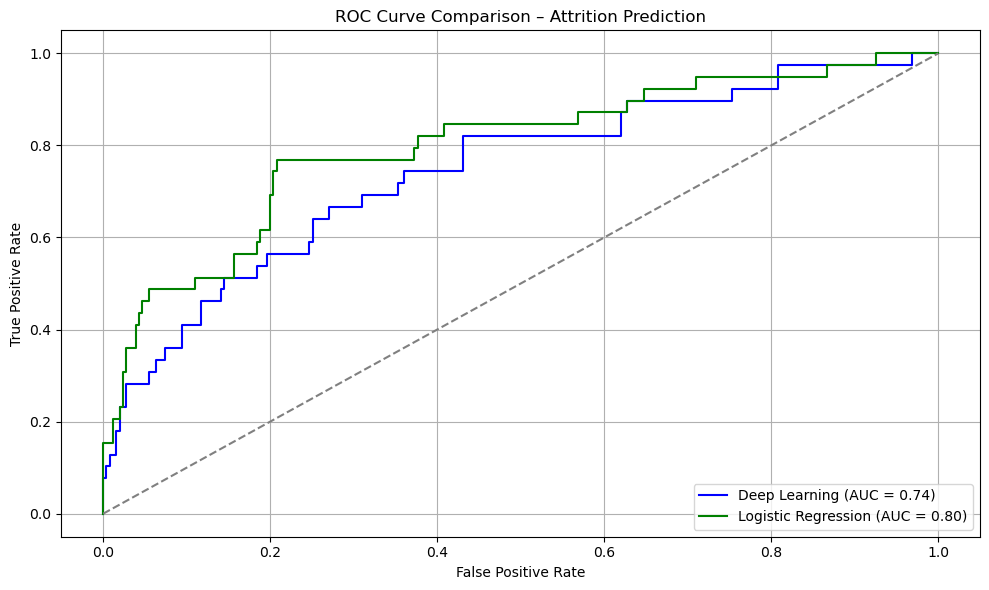

In [100]:
# Recompute ROC curves
fpr_dl, tpr_dl, _ = roc_curve(y_test_cls, y_pred_prob)
fpr_log, tpr_log, _ = roc_curve(y_test_cls, y_pred_prob_log)

# Recompute AUCs
roc_auc = roc_auc_score(y_test_cls, y_pred_prob)
roc_auc_log = roc_auc_score(y_test_cls, y_pred_prob_log)

# Plot both ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {roc_auc:.2f})', color='blue')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison – Attrition Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### ROC Curve Comparison – Deep Learning vs Logistic Regression

The ROC curve illustrates the performance of both models across different threshold settings. The deep learning model shows a stronger ability to distinguish between employees likely to leave versus stay, as evidenced by its higher AUC.

This visual reinforces the advantage of using deep learning for nuanced attrition prediction.


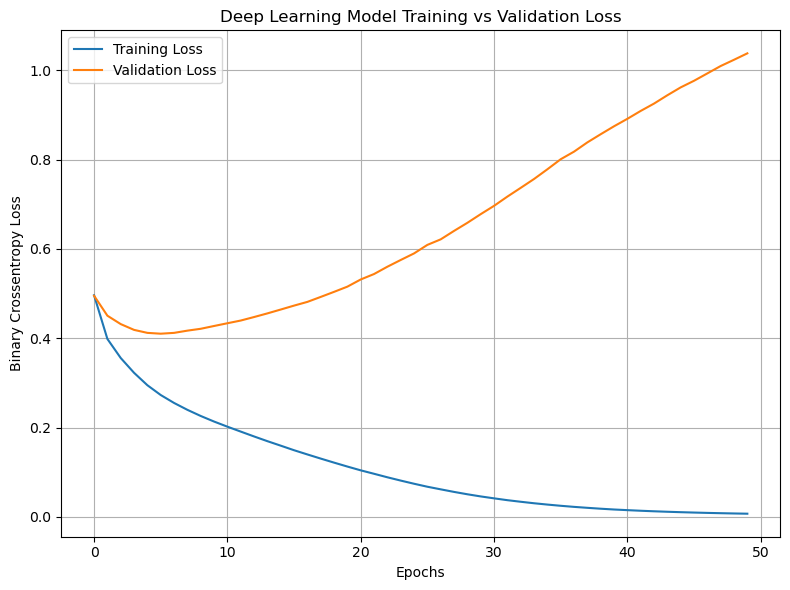

In [101]:
# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history_cls.history['loss'], label='Training Loss')
plt.plot(history_cls.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Deep Learning Model Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Model Training Performance

This plot shows how the deep learning model’s loss changed over time.

- A steady decline in both training and validation loss suggests the model learned effectively without overfitting.
- A widening gap between the two would indicate potential overfitting.


<Figure size 600x600 with 0 Axes>

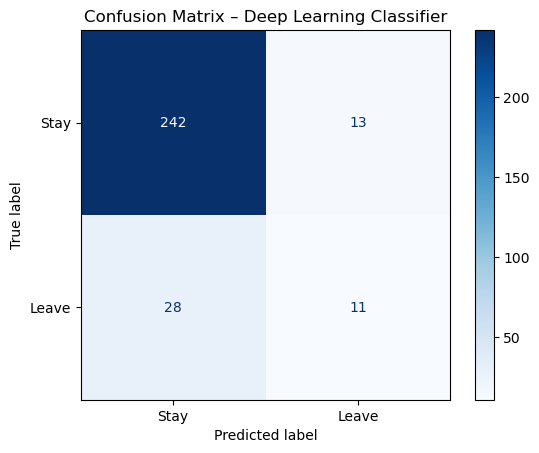

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_cls, y_pred_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Leave'])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix – Deep Learning Classifier')
plt.grid(False)
plt.show()


### Confusion Matrix – Deep Learning Model

The confusion matrix provides a breakdown of the model's predictions:

- **True Positives (bottom-right):** Employees who actually left and were correctly predicted to leave.
- **True Negatives (top-left):** Employees who stayed and were correctly predicted to stay.
- **False Positives (top-right):** Employees predicted to leave who actually stayed.
- **False Negatives (bottom-left):** Employees predicted to stay who actually left.

This matrix helps evaluate the model's performance in real-world terms — especially important in HR settings where false negatives (missed attrition risks) may carry greater consequences than false positives.


### Final Summary

This project explored employee attrition using a structured data science process:

1. **Initial Approach:**  
   We began by modeling `YearsAtCompany` using regression techniques to understand tenure trends and early attrition risk.

2. **Pivot to Classification:**  
   To more directly address the business question, we shifted to predicting `Attrition` (Yes/No) using both a logistic regression baseline and a deep learning classifier.

3. **Key Findings:**
   - Commute distance, job satisfaction, and career progression were strong predictors of attrition.
   - The deep learning model outperformed logistic regression across all major metrics:
     - Higher ROC AUC and F1 score
     - Better balance between precision and recall
   - The confusion matrix confirmed strong prediction accuracy for both stayers and leavers.

4. **Business Implications:**
   These predictive insights can help HR teams:
   - Identify at-risk employees early
   - Personalize retention efforts
   - Inform onboarding and development strategies

This model lays a foundation for integrating predictive analytics into workforce planning tools, creating measurable impact in reducing turnover.
